**Анализ оттока клиентов регионального банка**

**Задача**: Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

**Заказчик**: Отдел маркетинга.

**Цель**:  предоставить компактные однородные сегменты и дать примеры мероприятий, которые можно провести, чтобы вернуть клиентов в банк или удержать сомневающихся от оттока.

**Ход исследования**:

1. Загрузка данных и подготовка к исследованию.
2. Подготовка данных:
- Анализ пропусков;
- Выявление аномалий;
- Кодирование информации

3. Исследовательский анализ данных:
- Изучение графиков распределений в разрезе оттока;
- Построение портретов типичных клиентов банка и их сравнение;
- Корреляционный анализ данных, матрица корреляции.

4. Формулировка и проверка статистических гипотез:
- Средний уровень дохода между отточными клиентами и клиентами, которые остались, одинаковый.
- Средний возраст клиентов, которые ушли и которые остались одинаковый.

5. Промежуточный итог: какие показатели стратегически влияют на отток
6. Сегментация клиентов банка по значимым признакам.
7. Выводы и рекомендации для заказчика.
8. Подготовить презентацию, выделив ключевые моменты.


Презентация https://disk.yandex.ru/i/cOd-rUjG7Djn5g

# 1. Загрузка данных и подготовка к исследованию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from plotly import graph_objects as go
import seaborn as sns
from scipy import stats as st
import scipy.stats as stats
import numpy as np
import math as mth

In [2]:
import plotly.io as pio 
pio.renderers.default = "png" 
svg_renderer = pio.renderers["png"] 
svg_renderer.scale = 1.2

In [3]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную 
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv(path)

# 2. Подготовка данных:
## 2.1 Изучение общей информации, выявление дубликатов, пропусков, аномалий

In [4]:
df

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


Данные представляют собой таблицу, которая содержит 10000 строк и 12 столбцов. В столбцах представлена информация об
идентификаторе пользователя, его баллах кредитного скоринга, городе, поле, возрасте,количестве баллов собственности, балансе на счёте, количестве продуктов, которыми пользуется клиент, информация о наличии кредитной карты, данные об активности клиента и его з/п, а также информация о том, пользуется клиент услугами банка или разорвал с ним договорные отношения.

In [5]:
# для удобства дальнейшей работы приведем названия колонок к нижнему регистру
df.columns = df.columns.str.lower()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Типы данных актуальны, преобразовывать не нужно. В данных есть пропуски.


In [7]:
# посмотрим, сколько пропусков в данных
df.isna().sum()

userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

В столбце "age" 26 пропусков - 0,26% всех данных, в столбце "balance" 2295 пропусков - 22,95% всех данных.

In [8]:
df.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Явных аномалий в данных не обнаружено. Возраст клиентов 18-86 лет, доход, кредитный рейтинг не являются "0".

In [9]:
# много ли клиентов, которые не пользуются услугами банков
df.query('products==0')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Среди клиентов банка нашлась клиентка, у которой не оформлена ни одна банковская услуга. Показатель 'churn'=1, это отточный клиент. Я не считаю данную строку аномалией. Отсутствием продуктов можно объяснить прекращением сотрудничества с данным банком, возможно по естественным причинам, следовательно и все счета/продукты были закрыты.

In [10]:
# проверим на наличие явных дубликатов

print('Дубликатов в таблице', df.duplicated().sum())

Дубликатов в таблице 0


In [11]:
display(df['age'].unique(),
       df['equity'].unique(),
       df['products'].unique(),
       df['userid'].nunique())

array([25., 37., 30., 51., 34., 56., 39., 38., 54., 67., 52., 41., 31.,
       28., 35., 42., 45., 53., 40., 43., 47., 48., 61., 62., 36., 26.,
       27., 60., 72., 50., 46., 55., 58., 71., 44., 49., 33., 32., 66.,
       29., 68., 73., 69., 59., 21., 65., 57., 63., 80., 24., 70., 77.,
       64., 23., 20., 18., 19., 78., 74., 76., 22., 75., nan, 83., 82.,
       81., 84., 79., 86.])

array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9], dtype=int64)

array([2, 3, 1, 4, 5, 0], dtype=int64)

9927

В столбце 'userid' есть дубликаты. Рассмотрим их подробнее.

In [12]:
# выведем все дублирующиеся строки
df[df.duplicated(['userid'])]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,190253,726.0,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0
1837,210662,896.0,Рыбинск,Ж,37.0,0,NaN,2,0,0,90916.04,0
2138,131419,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2302,220816,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
9785,168998,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0
9819,140934,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


In [13]:
# рассмотрим обну из них
df.loc[df['userid']==116540]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0


Скорее всего в каждом из филиалов банка идентификаторы пользователей свои, они не сведены в одну общую сеть среди филиалов. Дубликатов в связке 'userid', 'city' не обнаружено.

In [14]:
len(df[df.duplicated(['userid', 'city'])])

0

## 2.2 Кодирование информации

В данных содержатся неупорядоченные категориальные переменные, такие как город, пол. Будет некорректно задавать неупорядоченным категориям какой-то числовой порядок. Используем фиктивную переменную. Фиктивная переменная — это числовая переменная, которая кодирует категориальную информацию (0-1).

In [15]:
# используем pd.get_dummies для создания фиктивных переменных
df['city_category'] = df['city'].copy()
df['gender_category'] = df['gender'].copy()
df = pd.get_dummies(df, columns = ['city_category'])
df = pd.get_dummies(df, columns = ['gender_category'])
df.head(5)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_category_Ростов,city_category_Рыбинск,city_category_Ярославль,gender_category_Ж,gender_category_М
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


In [16]:
df.rename(columns = {'city_category_Ростов':'city_category_rostov', 'city_category_Рыбинск':'city_category_rybinsk', 'city_category_Ярославль':'city_category_yaroslavl', 'gender_category_Ж':'gender_woman', 'gender_category_М':'gender_man'}, inplace = True )
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_category_rostov,city_category_rybinsk,city_category_yaroslavl,gender_woman,gender_man
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


Также введем фиктивную переменную для обозначения наличия пропусков в столбце 'balance': 
- 0- пропуска значений нет, 
- 1-значение в столбце 'balance' пропущено.

In [17]:
# размер баланса (0 - отсутствуют данные, 1 - есть данные)
def balance_nan(row):
    if row['balance'] >= 0:
        return 0
    else:
        return 1
    
df['balance_nan'] = df.apply(balance_nan, axis = 1) 
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_category_rostov,city_category_rybinsk,city_category_yaroslavl,gender_woman,gender_man,balance_nan
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,0


## 2.3 Анализ пропусков

Ранее было определено, что в столбце "age" 26 пропусков - 0,26% всех данных, в столбце "balance" 2295 пропусков - 22,95% всех данных. Рассмотрим их подробнее.

In [18]:
# определим пропуски в столбце 'age'
df[df['age'].isna()]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_category_rostov,city_category_rybinsk,city_category_yaroslavl,gender_woman,gender_man,balance_nan
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0,0,0,1,0,1,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0,0,1,0,1,0,1
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0,0,0,1,0,1,1
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1,1,0,0,1,0,0
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0,0,1,0,0,1,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0,0,1,0,1,0,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0,0,1,0,1,0,1
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0,0,1,0,1,0,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0,0,1,0,1,0,1
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0,0,0,1,1,0,0


Пропусков в столбце **'age'** лишь 0,26%, их можно было бы удалить. Но в этом случае, мы удалим и данные о важных клиентах банка, у которых на счетах сумма баланса и доходы выше среднего уровня по банку. Поэтому пока оставим, скорее всего пропуски не повлияют на дальнейший анализ.

Рассмотрим пропуски в столбце **'balance'**. Таких пропусков 2295 - 22,95%. Их нужно проанализировать подробнее.

Пропуски могут иметь разную природу появления (образования).Чтобы правильно их обработать, нужно выяснить причину их формирования. Различают следующие 3 механизма формирования пропусков: MCAR, MAR, MNAR:

- **MCAR** (Missing Completely At Random) — вероятность пропуска для каждой записи набора одинакова. Игнорирование/исключение записей, содержащих пропущенные данные, не ведет к искажению результатов.
- **MAR** (Missing At Random) — на практике данные обычно пропущены ввиду некоторых закономерностей. Пропуски относят к MAR, если вероятность пропуска может быть определена на основе другой имеющейся в наборе данных информации, не содержащей пропуски. В таком случае удаление или замена пропусков на значение «Пропуск», не приведет к существенному искажению результатов.
- **MNAR** (Missing Not At Random) — механизм формирования пропусков, при котором данные отсутствуют в зависимости от неизвестных факторов. 

In [19]:
missing_balance = df[df['balance'].isna()]
#missing_balance

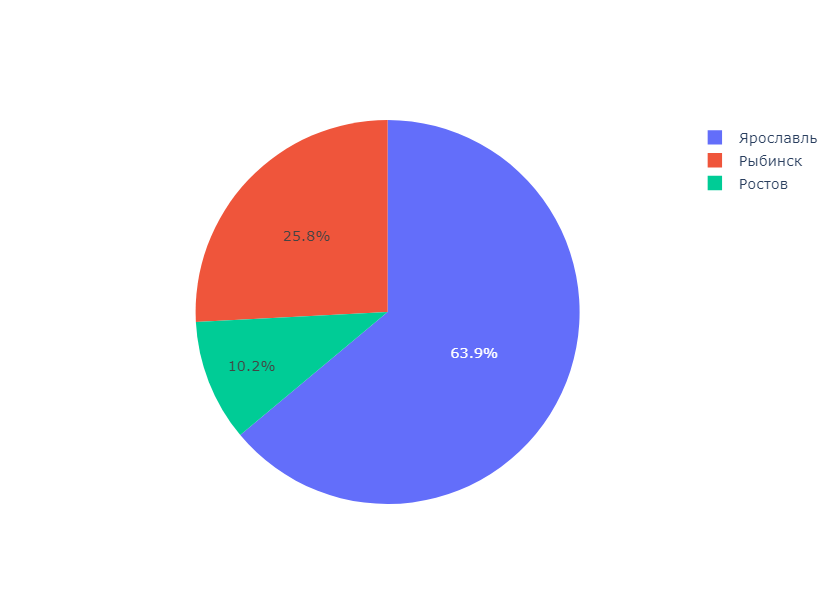

In [20]:
fig = go.Figure(data=[go.Pie(labels=missing_balance['city'])])
fig.show("png") 

Пропуски в балансе имеются у клиентов в каждом из филиалов. Т.е. наличие пропусков не связано с работой какого-либо конкретного отделения банка.

In [21]:
# есть ли клиенты с нулевым балансом
df[df['balance']==0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_category_rostov,city_category_rybinsk,city_category_yaroslavl,gender_woman,gender_man,balance_nan
3900,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0,0,0,1,0,1,0
6757,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0,0,0,1,0,1,0


Из 10000 клиентов только у 2 баланс равен 0. Можно предположить, что пропуски - отсутствие средств на счетах клиентов.

Рассмотрим, как выглядит типичный клиент банка с заполненными данными по балансу и с пропусками по этому показателю.

In [22]:
df.groupby(by='balance_nan').mean().round(2)

C:\Users\user\AppData\Local\Temp\ipykernel_3728\658362981.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_category_rostov,city_category_rybinsk,city_category_yaroslavl,gender_woman,gender_man
balance_nan,,,,,,,,,,,,,,,
0,171738.84,843.74,42.92,3.40,827794.31,2.08,0.64,0.52,124501.87,0.23,0.15,0.27,0.57,0.52,0.48
1,172069.45,865.35,42.09,0.05,NaN,1.16,0.82,0.55,226310.21,0.01,0.10,0.26,0.64,0.44,0.56


Типичные клиенты банка с пропусками в данных и без во многом схожи. В среднем, имеют одинаковый уровень кредитнго скоринга, схожий возраст, у них есть кредитные карты и проявляют схожую активность. 

Но, клиенты с пропусками в данных в среднем пользуются лишь одним банковским продуктом, и, скорее всего, это кредитная карта (среднее кол-во банковских продуктов - 1,16 на клиента, а кредитные карты есть у 86% клиентов. Также, уровень дохода таких клиентов почти в 2 раза выше, чем у клиентов без пропусков в данных, и они меньше подвержены оттоку, а оценочной собственности, наоборот, меньше, чем у клиентов без пропусков в данных.

In [23]:
#len(df.query('balance_nan==1 & credit_card==1 & products==1'))
#len(df.query('balance_nan==0 & credit_card==1 & products==1'))

In [24]:
df.query('balance_nan==0 & churn==1')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_category_rostov,city_category_rybinsk,city_category_yaroslavl,gender_woman,gender_man,balance_nan
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,0
12,132970,845.0,Ярославль,Ж,31.0,3,591928.52,2,1,1,112697.16,1,0,0,1,1,0,0
40,129705,811.0,Рыбинск,М,34.0,2,129799.35,1,0,0,96242.71,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,154871,892.0,Рыбинск,М,39.0,5,636287.72,2,0,1,227288.27,1,0,1,0,0,1,0
9986,152986,822.0,Ярославль,М,58.0,5,1434857.91,2,0,1,83442.41,1,0,0,1,0,1,0
9987,151279,783.0,Рыбинск,Ж,61.0,3,387916.16,2,1,0,63160.96,1,0,1,0,1,0,0
9992,167165,813.0,Рыбинск,М,48.0,2,179765.62,2,1,0,133972.11,1,0,1,0,0,1,0


Если рассмотреть коэффициенты корреляции данных столбца 'balance_nan' с остальными столбцами таблицы мои наблюдения можно подтвердить величиной коэффициента корреляции Пирсона.

In [25]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_3728\1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_category_rostov,city_category_rybinsk,city_category_yaroslavl,gender_woman,gender_man,balance_nan
userid,1.000000,0.009804,0.017795,0.004599,0.006133,-0.004504,0.005674,-0.031029,-0.000369,-0.011928,-0.033657,0.014615,0.010675,-0.030666,0.030666,0.004125
score,0.009804,1.000000,-0.011814,0.064126,0.235812,-0.004115,-0.094732,-0.031179,0.163866,0.105962,-0.037637,-0.000323,0.026967,-0.012253,0.012253,0.138871
age,0.017795,-0.011814,1.000000,0.020628,0.069745,0.017182,-0.123128,-0.008157,-0.039598,-0.049797,0.046985,0.029453,-0.059876,0.212821,-0.212821,-0.028659
equity,0.004599,0.064126,0.020628,1.000000,0.164126,0.432069,-0.167506,-0.001970,-0.171974,0.270559,0.036292,-0.005619,-0.020655,0.021622,-0.021622,-0.709951
balance,0.006133,0.235812,0.069745,0.164126,1.000000,0.075684,-0.059253,0.025004,0.339622,0.085577,-0.035805,-0.034697,0.057342,-0.051711,0.051711,NaN
products,-0.004504,-0.004115,0.017182,0.432069,0.075684,1.000000,-0.251390,0.037141,-0.118054,0.300964,-0.006125,-0.042630,0.042782,0.022672,-0.022672,-0.487512
credit_card,0.005674,-0.094732,-0.123128,-0.167506,-0.059253,-0.251390,1.000000,-0.033445,0.035556,-0.130790,-0.098463,-0.050109,0.114971,-0.126350,0.126350,0.158334
last_activity,-0.031029,-0.031179,-0.008157,-0.001970,0.025004,0.037141,-0.033445,1.000000,0.003039,0.168767,0.007005,0.048811,-0.048979,0.013662,-0.013662,0.028362
est_salary,-0.000369,0.163866,-0.039598,-0.171974,0.339622,-0.118054,0.035556,0.003039,1.000000,0.001273,-0.106060,-0.057435,0.126962,-0.082376,0.082376,0.307154
churn,-0.011928,0.105962,-0.049797,0.270559,0.085577,0.300964,-0.130790,0.168767,0.001273,1.000000,0.006024,-0.031244,0.023905,-0.141036,0.141036,-0.249421


Между показателями наличия/отсутствия баланса и возрастом, активностью коэффициент корреляции низок, что может говорить об отсутствии связи между этими показателями. 

Между показателями наличия/отсутствия баланса и показателями кредитного скоринга, наличием кредитной карты, оттоком коэффициент корреляции находится в пределах 0,1-0,3, что может говорить наличии слабой связи между этими показателями. 

А вот между показателями наличия/отсутствия баланса и показателями оценочной собственности присутствует сильная обратная связь. Умеренная связь наблюдается между показателями наличия/отсутствия баланса и показателями количества банковских продуктов (умеренная обратная связь) и размером дохода (умеренная прямая связь).

Пропуски можно отнести к категории MNAR — пропуски зависят от данных, их нельзя отбрасывать, т.к. это приведёт к заметным искажениям.
Между пропусками и другими признаками есть взаимосвязь, но ее не достаточно, чтобы с уверенностью сказать чем заменить пропуски 0 (клиенты не хранят ден.средства на дебетовом счете и пользуются только заемными средствами) или числовым значением. Пропусков в столбце много, поэтому удалить их не представляется возможным, а их замена может привести к искажению результатов последующего исследования.

Достоверно не известно, чем вызваны пропуски в данных, возможно дело в техническом сбое при переносе/заполнении данных. 

В ходе предобработки были проанализированы и предобработаны входные данные:
- Данные представляют собой таблицу, которая содержит 10000 строк и 12 столбцов.
- Аномалий в данных не обнаружено. Возраст клиентов 18-86 лет, доход, кредитный рейтинг не являются "0".
- Дубликатов нет.
- Введены фиктивные переменные для неупорядоченных категориальных переменных: город, пол, наличие баланся на счете.
- Проанализированы пропуски в столбцах.

# 3. Исследовательский анализ данных.


## 3.1 Изучим средние значения показателей

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,10000.0,171814.712600,3.370824e+04,94561.0,142810.25,172728.000,201261.7500,2.291450e+05
score,10000.0,848.699400,6.544852e+01,642.0,802.00,853.000,900.0000,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,33.00,40.000,51.0000,8.600000e+01
equity,10000.0,2.627600,1.980836e+00,0.0,0.00,3.000,4.0000,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,295554.16,524272.200,980705.8500,1.191136e+08
products,10000.0,1.870100,7.926467e-01,0.0,1.00,2.000,2.0000,5.000000e+00
credit_card,10000.0,0.680400,4.663449e-01,0.0,0.00,1.000,1.0000,1.000000e+00
last_activity,10000.0,0.523500,4.994724e-01,0.0,0.00,1.000,1.0000,1.000000e+00
est_salary,10000.0,147866.885544,1.393885e+05,2546.3,75251.90,119658.105,174500.5425,1.395064e+06
churn,10000.0,0.182000,3.858638e-01,0.0,0.00,0.000,0.0000,1.000000e+00


Из данных таблицы можно сделать вывод:
- в основном у клиентов баллы кредитного скоринга варьируются в пределах 802-900 баллов.
- клиенты банка - люди в возрасте 33-51 год.
- оценка собственности - 0-4 балла.
- на балансе счетов 295554.16 - 980705.85 р.
- у клиентов оформлено 1-2 продукта.
- у 68% клиентов имеется кредитная карта.
- 52% клиентов проявляют активность в пользовании банковскими услугами.
- ежемесячный доход клиентов банка варьируются в пределах 75251.90 - 174500.54, что можно считать неплохим размером для клиентов из регионального банка.
- к оттоку склонны 18% клиентов.
- 58,8% клиентов проживают в Ярославле.
- мужчин и женщин примерно одинаковое количество.

## 3.2 Изучение графиков распределений

Построим графики распределений каждого из показателей в разрезе оттока (в разбивке по столбцу churn).

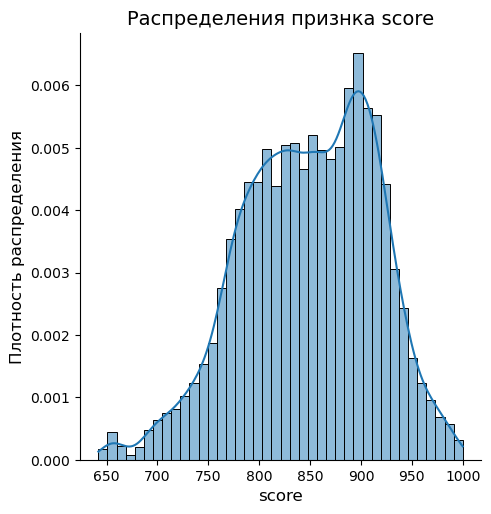

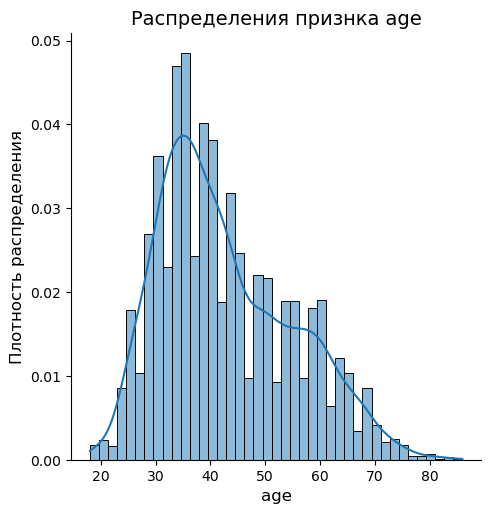

In [27]:
# распределения признаков баллы кредитного скоринга и возраст клиентов
col_list = ['score', 'age']
for name in col_list:
    sns.displot(data=df, x=name, kde=True, stat="density")
    plt.title(label = "Распределения признка " + name, fontsize = 14)
    plt.ylabel('Плотность распределения',  fontsize = 12)
    plt.xlabel(name, size = 12)
plt.show()    

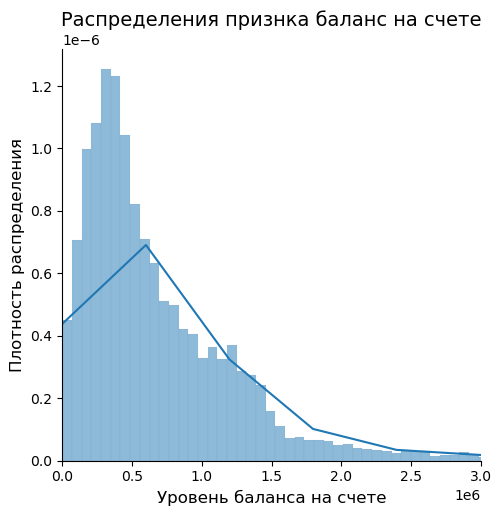

In [28]:
# распределения признака баланс на счете
sns.displot(data=df, x='balance', kde=True, stat="density")
plt.title(label = "Распределения признка баланс на счете", fontsize = 14)
plt.ylabel('Плотность распределения',  fontsize = 12)
plt.xlabel('Уровень баланса на счете', size = 12)
plt.xlim(0, 3000000)
plt.show()  

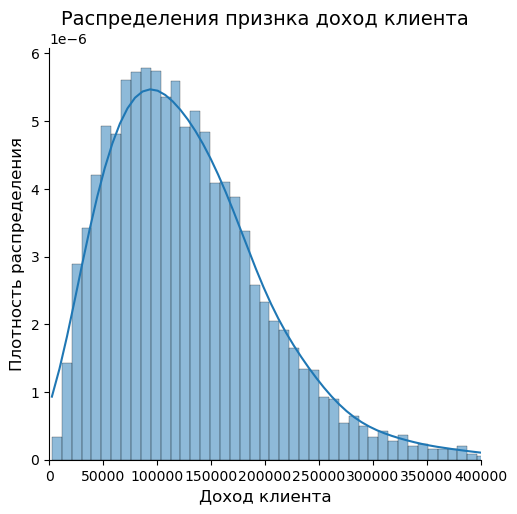

In [29]:
# распределения признака доход клиента
sns.displot(data=df, x='est_salary', kde=True, stat="density")
plt.title(label = "Распределения признка доход клиента", fontsize = 14)
plt.ylabel('Плотность распределения',  fontsize = 12)
plt.xlabel('Доход клиента', size = 12)
plt.xlim(0, 400000)
plt.show()  

Из графиков видно, что баллы кредитного скоринга, возраст, баланс и уровень дохода имеют распределения, близкие к нормальному. 

Для категориальных данных построим столбчатые диаграммы.

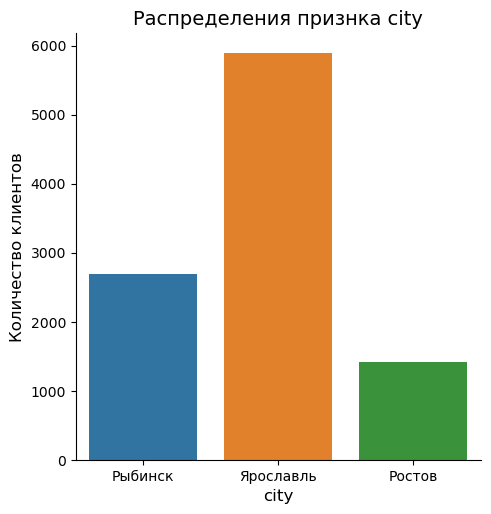

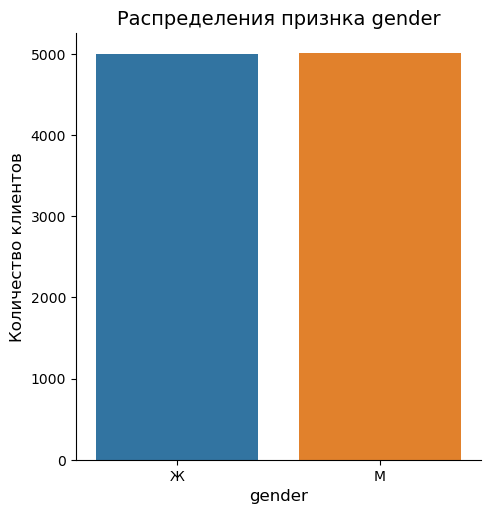

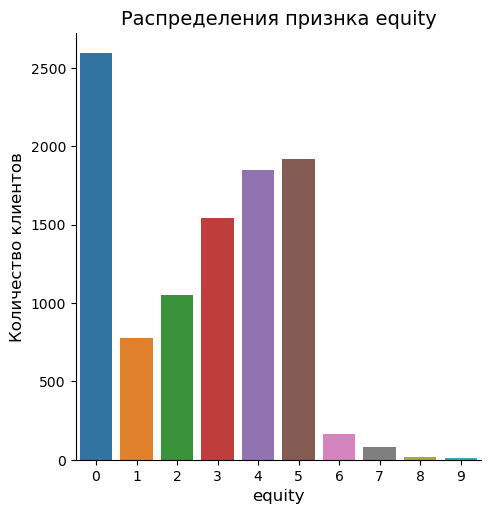

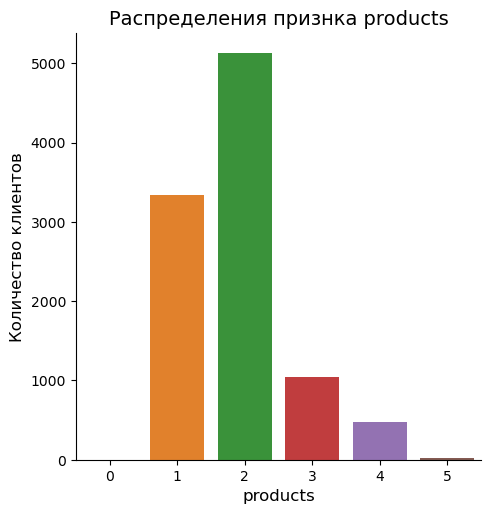

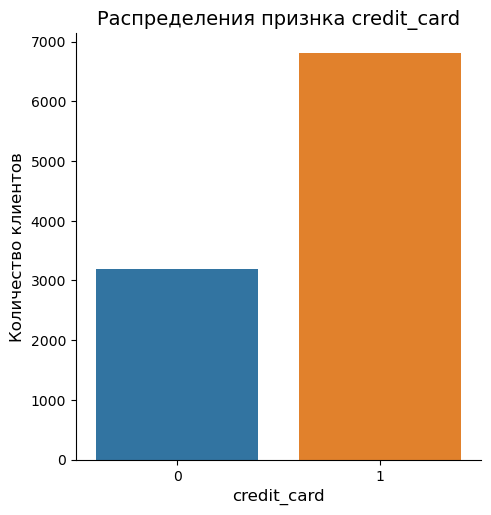

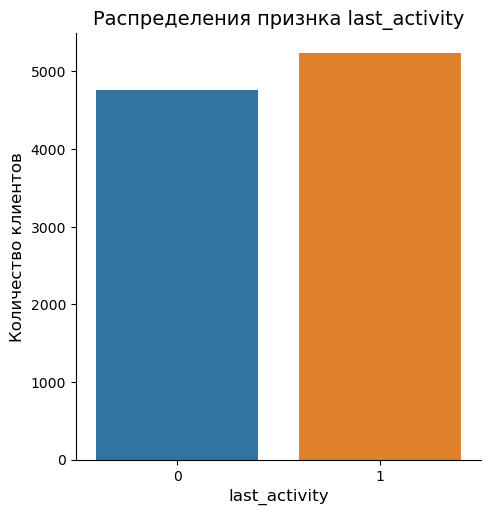

In [30]:
categor_list = ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']

#fig, ax = plt.subplots(1, len(categor_list), figsize=(24, 5))
for i in categor_list:
    sns.catplot(x=i, kind='count', data=df)
    plt.title(label = "Распределения признка " + i, fontsize = 14)
    plt.ylabel('Количество клиентов',  fontsize = 12)
    plt.xlabel(i, size = 12)
    plt.show()  

Графики подтверждают выводы, сделанные ранее:
- большинство клиентов банка находится в Ярославле,
- женщин и мужчин-клиентов одинакове количество,
- у большинства клиентов 0 баллов оценки собственности,
- у большинства клиентов имеется 2 банковских продукта, в т.ч. и кредитная карта,
- активных клиентов больше, чем неактивных.

## 3.3 Изучение графиков распределений в разрезе оттока

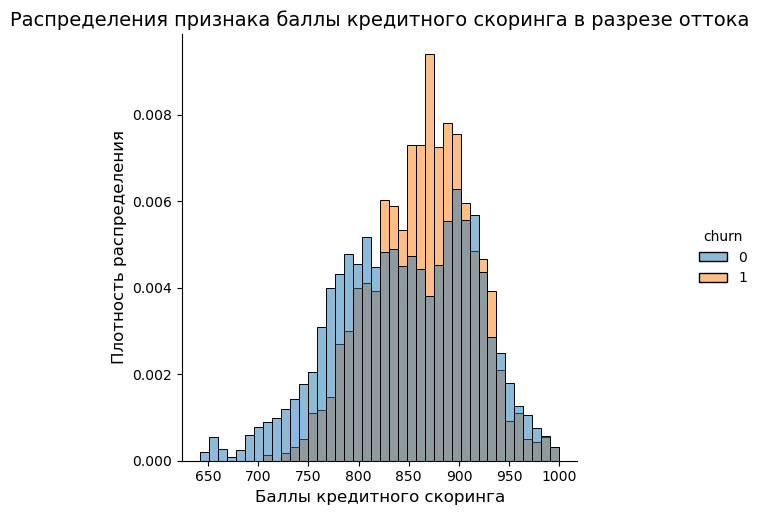

In [31]:
# распределения признака баллы кредитного скоринга в разрезе оттока
sns.displot(data=df, x='score', stat="density", hue = 'churn', common_norm=False)
plt.title(label = "Распределения признака баллы кредитного скоринга в разрезе оттока", fontsize = 14)
plt.ylabel('Плотность распределения',  fontsize = 12)
plt.xlabel('Баллы кредитного скоринга', size = 12)
plt.show()  

Наиболее склонны к оттоку клиенты, имеющие более 820 баллов, но менее 910, а также 930-940 баллов.

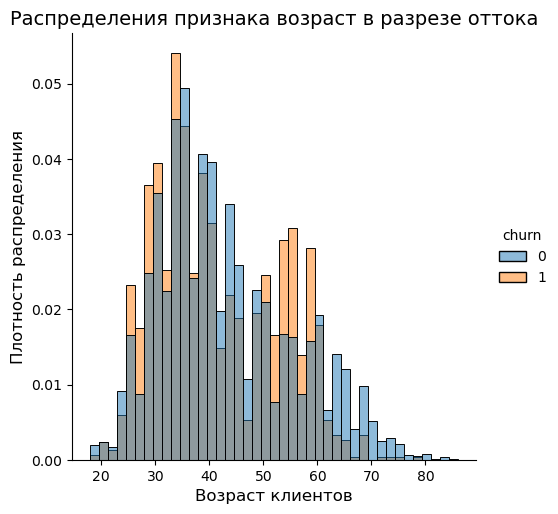

In [32]:
# распределения признака возраст в разрезе оттока
sns.displot(data=df, x='age', stat="density", hue = 'churn', common_norm=False)
plt.title(label = "Распределения признака возраст в разрезе оттока", fontsize = 14)
plt.ylabel('Плотность распределения',  fontsize = 12)
plt.xlabel('Возраст клиентов', size = 12)
plt.show()  


<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Тут количество бинов неверное, отсюда "лесенка"
</div>

Наиболее склонны к оттоку молодые клиенты в возрасте 26-35 лет и люди предпенсионного возраста - 50-59 лет.

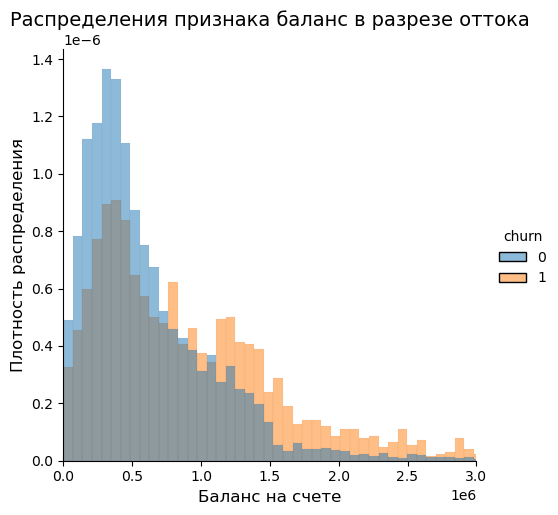

In [33]:
# распределения признака баланс в разрезе оттока
sns.displot(data=df, x='balance', stat="density", hue = 'churn', common_norm=False)
plt.xlim(0, 3000000)
plt.title(label = "Распределения признака баланс в разрезе оттока", fontsize = 14)
plt.ylabel('Плотность распределения',  fontsize = 12)
plt.xlabel('Баланс на счете', size = 12)
plt.show()  


Наиболее склонны к оттоку клиенты, хранящие на счетах суммы свыше 750000 рублей. Особенно высока вероятность оттока клиентов с суммами на счетах выше 1,2 млн.рубл.

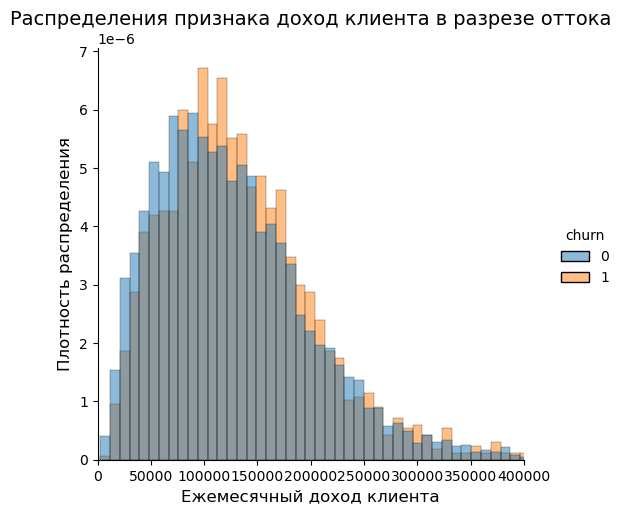

In [34]:
# распределения признака доход клиента в разрезе оттока
sns.displot(data=df, x='est_salary', stat="density", hue = 'churn', common_norm=False)
plt.xlim(0, 400000)
plt.title(label = "Распределения признака доход клиента в разрезе оттока", fontsize = 14)
plt.ylabel('Плотность распределения',  fontsize = 12)
plt.xlabel('Ежемесячный доход клиента', size = 12)
plt.show()  

Наиболее склонны к оттоку клиенты, имеющие высокий ежемесячный доход - 90000-140000 рублей, 150000-210000 рублей.

In [35]:
# отток клиентов в зависимости от пола клиента
#ax = sns.countplot(x='gender', data=df, hue='churn')
#plt.title(label = "Отток в зависимости от пола клиента", fontsize = 14)
#plt.ylabel('Количество клиентов',  fontsize = 12)
#plt.xlabel('Пол клиента', size = 12)

#total = float(len(df))
#for p in ax.patches:
#    height = p.get_height()
#    ax.text(p.get_x()+p.get_width()/2., height, '{:.1f}%'.format(height/total*100), ha="center")

#plt.show()

In [36]:
df['churn'].mean()*100

18.2

Средний уровень оттока клиентов в банке - 18,2%.

In [37]:
# сводная таблица пол-отток клиентов
gender_pivot = df.pivot_table(index='churn', columns='gender', values='userid', aggfunc='count').T
gender_pivot['churn_persent'] = (gender_pivot[1]/(gender_pivot[0]+gender_pivot[1])*100).round(2)
gender_pivot

churn,0,1,churn_persent
gender,,,
Ж,4358,637,12.75
М,3822,1183,23.64


In [38]:
# функция для создания подписей на графиках
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        label = labels[i]
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}%'.format(label),
                ha='center', va='bottom')

<function matplotlib.pyplot.show(close=None, block=None)>

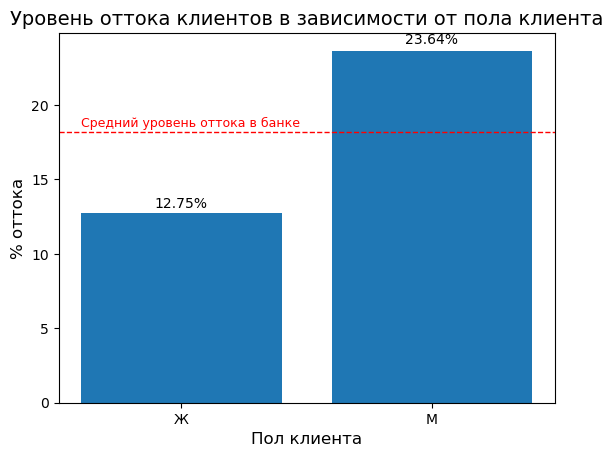

In [39]:
# график уровня оттока в зависимости от пола клиента
bars = plt.bar(gender_pivot.index, gender_pivot['churn_persent'])
ax = plt.gca()
autolabel(ax.patches, gender_pivot['churn_persent'], height_factor=1.01)
plt.axhline(y=df['churn'].mean()*100, color = 'red', linestyle ="--", linewidth=1)
plt.text(x=-0.4, y=18.5,  s='Средний уровень оттока в банке', ha='left', size=9, color='red')
plt.title(label = "Уровень оттока клиентов в зависимости от пола клиента", fontsize = 14)
plt.ylabel("% оттока",  fontsize = 12)
plt.xlabel( "Пол клиента", size = 12)
plt.show

Наиболее склонны к оттоку мужчины. 23,64% мужчин склонны к оттоку, женщин, склонных к оттоку лишь 12,75%.

<function matplotlib.pyplot.show(close=None, block=None)>

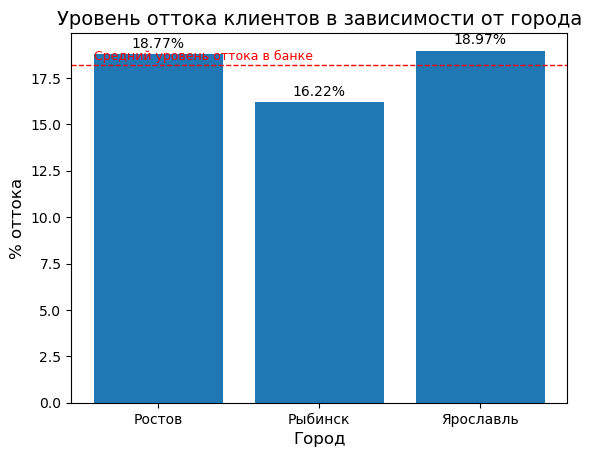

In [40]:
#сводная таблица
city_pivot = df.pivot_table(index='churn', columns='city', values='userid', aggfunc='count').T
city_pivot['churn_persent'] = (city_pivot[1]/(city_pivot[0]+city_pivot[1])*100).round(2)

# график уровня оттока в зависимости от города клиента
bars = plt.bar(city_pivot.index, city_pivot['churn_persent'])
ax = plt.gca()
autolabel(ax.patches, city_pivot['churn_persent'], height_factor=1.01)
plt.axhline(y=df['churn'].mean()*100, color = 'red', linestyle ="--", linewidth=1)
plt.text(x=-0.4, y=18.5,  s='Средний уровень оттока в банке', ha='left', size=9, color='red')
plt.title(label = "Уровень оттока клиентов в зависимости от города", fontsize = 14)
plt.ylabel("% оттока",  fontsize = 12)
plt.xlabel( "Город", size = 12)
plt.show

Наиболее склонны к оттоку клиенты из Ростова и Ярославля. Уровень оттока в этих городах незначительно выше, чем средний уровень оттока по банку. В Рыбинске отточных клиентов меньше - 16,22%, чем в среднем по банку.

<function matplotlib.pyplot.show(close=None, block=None)>

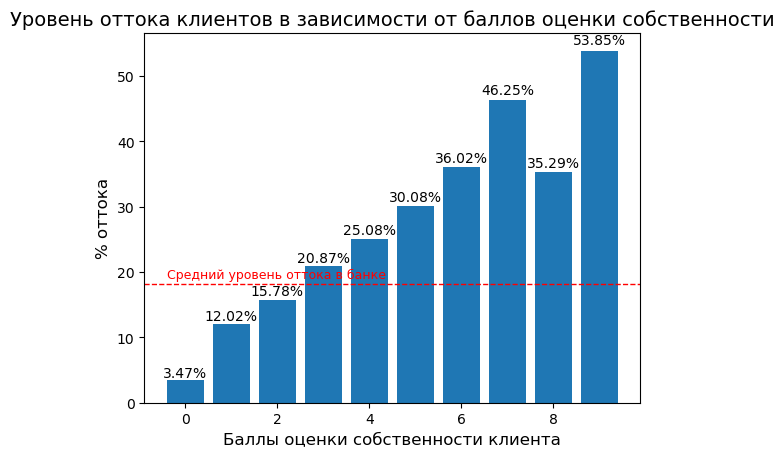

In [41]:
#сводная таблица
equity_pivot = df.pivot_table(index='churn', columns='equity', values='userid', aggfunc='count').T
equity_pivot['churn_persent'] = (equity_pivot[1]/(equity_pivot[0]+equity_pivot[1])*100).round(2)

# график уровня оттока в зависимости от баллов оценки собственности
bars = plt.bar(equity_pivot.index, equity_pivot['churn_persent'])
ax = plt.gca()
autolabel(ax.patches, equity_pivot['churn_persent'], height_factor=1.01)
plt.axhline(y=df['churn'].mean()*100, color = 'red', linestyle ="--", linewidth=1)
plt.text(x=-0.4, y=19,  s='Средний уровень оттока в банке', ha='left', size=9, color='red')
plt.title(label = "Уровень оттока клиентов в зависимости от баллов оценки собственности", fontsize = 14)
plt.ylabel("% оттока",  fontsize = 12)
plt.xlabel("Баллы оценки собственности клиента", size = 12)
plt.show

Наиболее склонны к оттоку клиенты, имеющие от 3 баллов оценки собственности, особенно склонны к оттоку клиент с 6-9 баллами (более 30% клиентов задумываются разорвать отношения с банком).

<function matplotlib.pyplot.show(close=None, block=None)>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


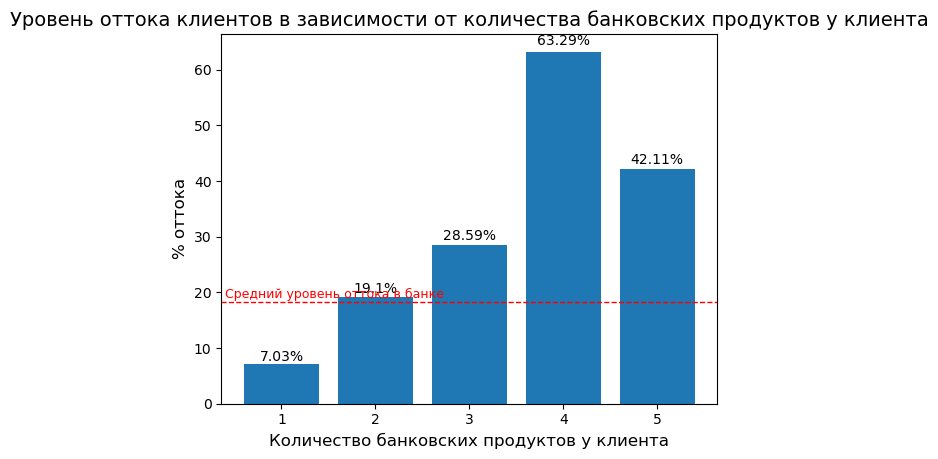

In [42]:
#сводная таблица
products_pivot = df.pivot_table(index='churn', columns='products', values='userid', aggfunc='count').T
products_pivot['churn_persent'] = (products_pivot[1]/(products_pivot[0]+products_pivot[1])*100).round(2)

# график уровня оттока в зависимости от количества банковских продуктов у клиента
bars = plt.bar(products_pivot.index, products_pivot['churn_persent'])
ax = plt.gca()
autolabel(ax.patches, products_pivot['churn_persent'], height_factor=1.01)
plt.axhline(y=df['churn'].mean()*100, color = 'red', linestyle ="--", linewidth=1)
plt.text(x=0.4, y=19,  s='Средний уровень оттока в банке', ha='left', size=9, color='red')
plt.title(label = "Уровень оттока клиентов в зависимости от количества банковских продуктов у клиента", fontsize = 14)
plt.ylabel("% оттока",  fontsize = 12)
plt.xlabel("Количество банковских продуктов у клиента", size = 12)
plt.show

Уровень оттока клиентов с 1 банковским продуктом составляет 7,03%, что существенно ниже среднего значения по банку (18,2%), среди клиентов с 2 продуктами уровень оттока сопоставим со средним по банку. Среди клиентов, у которых оформлено более 3 продуктов уровень оттока высок.

<function matplotlib.pyplot.show(close=None, block=None)>

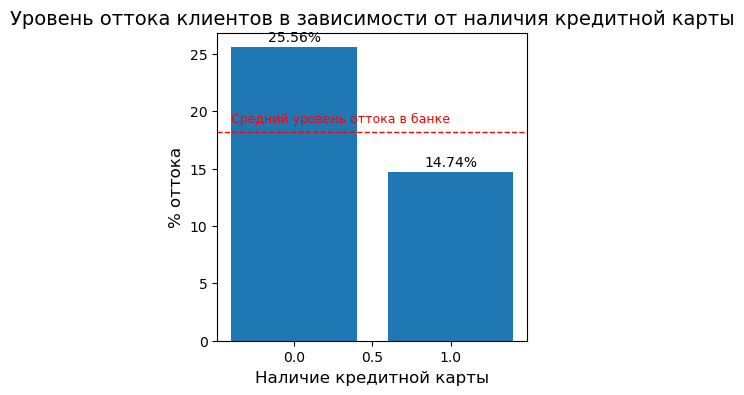

In [43]:
#сводная таблица
credit_card_pivot = df.pivot_table(index='churn', columns='credit_card', values='userid', aggfunc='count').T
credit_card_pivot['churn_persent'] = (credit_card_pivot[1]/(credit_card_pivot[0]+credit_card_pivot[1])*100).round(2)

# график уровня оттока в зависимости от наличия кредитной карты
plt.figure(figsize = (4, 4))
bars = plt.bar(credit_card_pivot.index, credit_card_pivot['churn_persent'])
ax = plt.gca()
autolabel(ax.patches, credit_card_pivot['churn_persent'], height_factor=1.01)
plt.axhline(y=df['churn'].mean()*100, color = 'red', linestyle ="--", linewidth=1)
plt.text(x=-0.4, y=19,  s='Средний уровень оттока в банке', ha='left', size=9, color='red')
plt.title(label = "Уровень оттока клиентов в зависимости от наличия кредитной карты", fontsize = 14)
plt.ylabel("% оттока",  fontsize = 12)
plt.xlabel("Наличие кредитной карты", size = 12)
plt.show

Клиенты, которые не имеют кредитной карты чаще уходят из банка.

<function matplotlib.pyplot.show(close=None, block=None)>

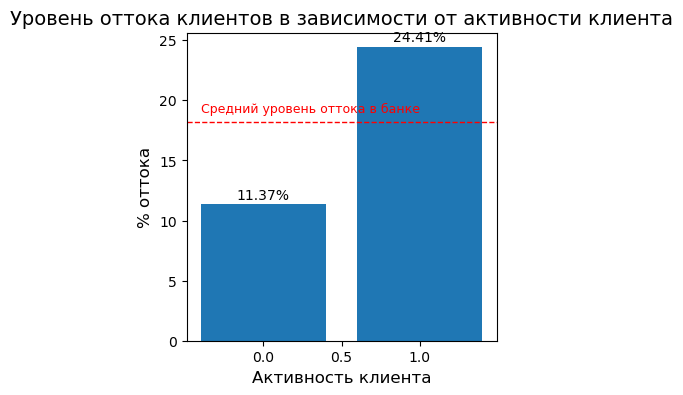

In [44]:
#сводная таблица
activity_pivot = df.pivot_table(index='churn', columns='last_activity', values='userid', aggfunc='count').T
activity_pivot['churn_persent'] = (activity_pivot[1]/(activity_pivot[0]+activity_pivot[1])*100).round(2)

# график уровня оттока в зависимости от активности клиента
plt.figure(figsize = (4, 4))
bars = plt.bar(activity_pivot.index, activity_pivot['churn_persent'])
ax = plt.gca()
autolabel(ax.patches, activity_pivot['churn_persent'], height_factor=1.01)
plt.axhline(y=df['churn'].mean()*100, color = 'red', linestyle ="--", linewidth=1)
plt.text(x=-0.4, y=19,  s='Средний уровень оттока в банке', ha='left', size=9, color='red')
plt.title(label = "Уровень оттока клиентов в зависимости от активности клиента", fontsize = 14)
plt.ylabel("% оттока",  fontsize = 12)
plt.xlabel("Активность клиента", size = 12)
plt.show

Клиенты, склонные к уходу из банка чаще проявляли активность, возможно это были обращения на горячую линию или заявления о закрытии счетов.

# 3.4 **Построение портретов типичных клиентов банка и их сравнение**

In [45]:
# средние показатели клиентов в разрезе оттока
typical_client = df.groupby(by='churn').mean().round(2)
typical_client

C:\Users\user\AppData\Local\Temp\ipykernel_3728\2746371221.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,city_category_rostov,city_category_rybinsk,city_category_yaroslavl,gender_woman,gender_man,balance_nan
churn,,,,,,,,,,,,,,,
0,172004.36,845.43,43.02,2.37,733982.59,1.76,0.71,0.48,147783.20,0.14,0.28,0.58,0.53,0.47,0.28
1,170962.35,863.40,41.45,3.76,1133993.27,2.38,0.55,0.70,148243.01,0.15,0.24,0.61,0.35,0.65,0.01


In [46]:
# добавим строки с разницей средних покзателей у отточных и неотточных клиентов
typical_client.loc['difference'] = typical_client.loc[1] - typical_client.loc[0]
typical_client.loc['dif_%'] = (typical_client.loc[1]/typical_client.loc[0]*100-100).round(2)

typical_client

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,city_category_rostov,city_category_rybinsk,city_category_yaroslavl,gender_woman,gender_man,balance_nan
churn,,,,,,,,,,,,,,,
0,172004.36,845.43,43.02,2.37,733982.59,1.76,0.71,0.48,147783.20,0.14,0.28,0.58,0.53,0.47,0.28
1,170962.35,863.40,41.45,3.76,1133993.27,2.38,0.55,0.70,148243.01,0.15,0.24,0.61,0.35,0.65,0.01
difference,-1042.01,17.97,-1.57,1.39,400010.68,0.62,-0.16,0.22,459.81,0.01,-0.04,0.03,-0.18,0.18,-0.27
dif_%,-0.61,2.13,-3.65,58.65,54.50,35.23,-22.54,45.83,0.31,7.14,-14.29,5.17,-33.96,38.30,-96.43


Типичный клиент, склонный к оттоку - это:
- мужчина возрастом 41-42 года
- из Ярославля
- у которого оформленно более 2 банковских продуктов
- высокий кредитный рейтинг
- у клиента более 3 баллов оценочной собственности по системе банка
- он проявлял активность при пользовании банковскими услугами
- на его счете более 1,1 млн.рубл.
- зарплата около 148 000 рубл.

Согласно данным уровень баллов кредитного скорринга (разница 2%) и возраст отточного и неотточного клиентов (разница 3,65%, отточный моложе) практически не отличаются. А уровень ежемесячного дохода у отточного и неотточного клиента практически равный (разница 0,3%).

У отточного и неотточного клиентов сильны различия в 
- баллах оценочной собственности (на 58,65% баллы отточных клиентов выше),
- размере баланса денежных средств на счетах (на 54,50% баланс отточных клиентов выше),
- количестве оформленных банковских продуктов,
- наличие кредитной карты,
- активности.

Проверим это статистически.

## 3.5 Гипотеза о равенстве средних ежемесячных доходов отточного и неотточного клиентов

Выдвинем гипотезу Н0 - средний ежемесячный доход  отточного и неотточного клиента одинаков, Н1 - средний ежемесячный доход отточного и неотточного клиента различны.

Для проверки гипотезы будем использовать t-критерий Стьюдента.
Условия использования t-критерий Стьюдента:
- Генеральные совокупности не должны зависеть друг от друга.
- Выборочные средние должны быть нормально распределены.
- Дисперсии рассматриваемых генеральных совокупностей должны быть равны.

В нашем случае 
- выборки независимы, поэтому использую метод ttest_ind. 
- Согласно ЦПТ, если размер выборки составляет хотя бы несколько десятков значений (у нас гораздо больше), выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. 
- Дисперсии нельзя считать равными поэтому укажем аргумент "equal_var = False".

In [47]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(df.query('churn == 0')['est_salary'], df.query('churn == 1')['est_salary'], equal_var = False)

# alpha = зададим значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


0.8887054822123845
Не получилось отвергнуть нулевую гипотезу


По результатам проведения t-теста не получилось отвергнуть нулевую гипотезу, т.к. значение p-value оказалось значительно больше критического уровеня статистической значимости (alpha). Значит средний ежемесячный доход  отточного и неотточного клиента не имеет статистически значимой разницы.

Попробуем подтвердить или опровергнуть данную гипотезу непараметрическим критерем U Манна-Уитни. Он применяется для сравнения средних значений двух независимых выборок.

Условия применения:
- Сравниваемые значения не составляют пару коррелирующих  значений
- Распределение признаков в каждой выборке может не соответствовать нормальному распределению

In [48]:
# results = вызов метода для проверки гипотезы
results_mu = stats.mannwhitneyu(df.query('churn == 0')['est_salary'], df.query('churn == 1')['est_salary'])

# alpha = зададим значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results_mu.pvalue)
# условный оператор с выводом строки с ответом
if results_mu.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


0.000243559272811695
Отвергаем нулевую гипотезу


Применением критерия Манна-Уитни Н0 была отвергнута. Но, для использования критерия Манна-Уитни есть несколько ограничений:
1. Число испытуемых в группах при использовании критерия МаннаУитни не должно быть больше 60 человек.
2. Минимальное число испытуемых – 3 человека в каждой группе.
3. Объем групп не должен быть строго одинаковым, но не должен сильно различаться.
Т.е. тест применим на малых выборках.

В исследуемых данных число наблюдений гораздо больше 60 (10000), объем групп разный. Т.е в нашем случае проверять гипотезу с использованием критерия Манна-Уитни нельзя. Он ведет к ложным результатам.

## 3.6 Корреляционный анализ данных, матрица корреляции

C:\Users\user\AppData\Local\Temp\ipykernel_3728\3980590682.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



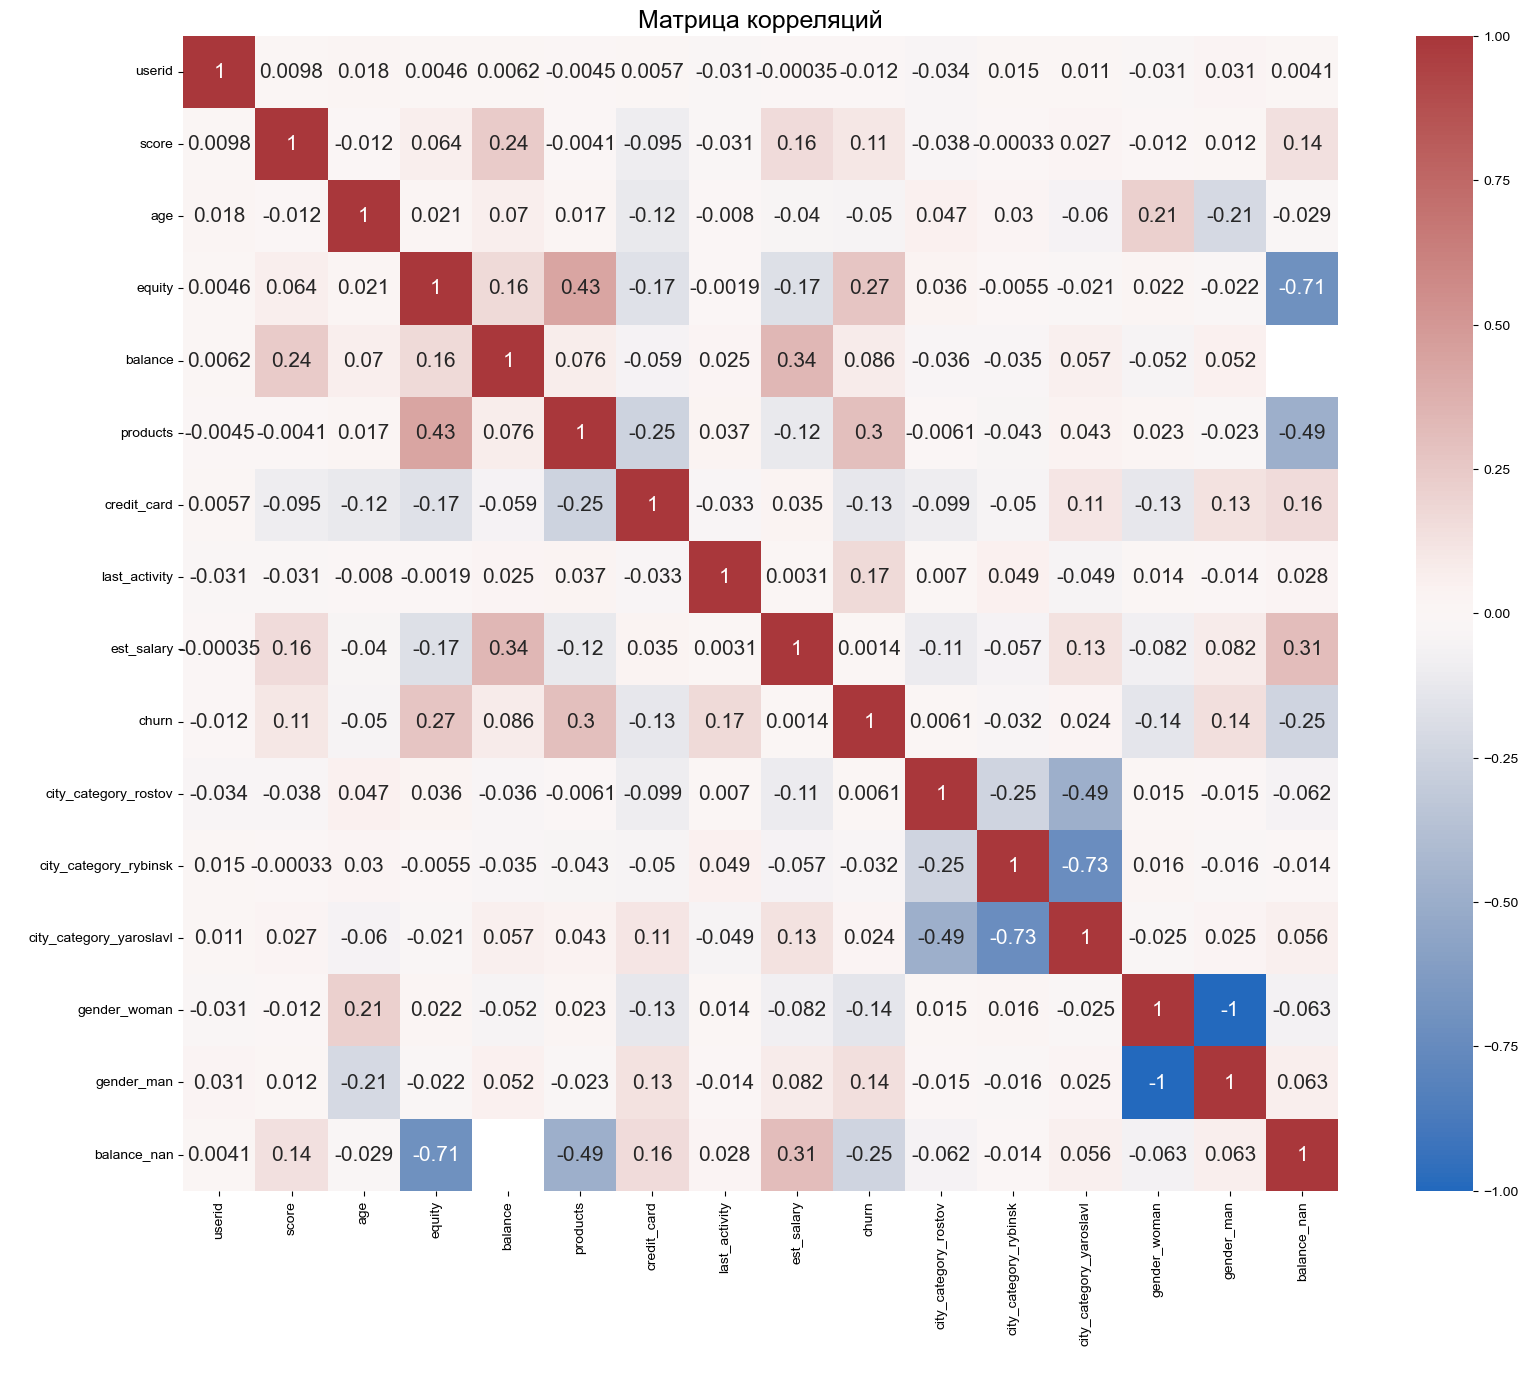

In [49]:
# построим и отрисуем матрицу корреляций
matrix_corr=df.loc[1:].corr()
plt.figure(figsize=(20,15))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(matrix_corr,annot=True,square=True, annot_kws = {'size':15}, cmap="vlag", center=0)
sns.set(rc = {'figure.figsize':(15,15)})
plt.title('Матрица корреляций', fontsize = 18)
plt.show()


Из всей матрицы необходимы только данные о корееляции с признаком 'churn'

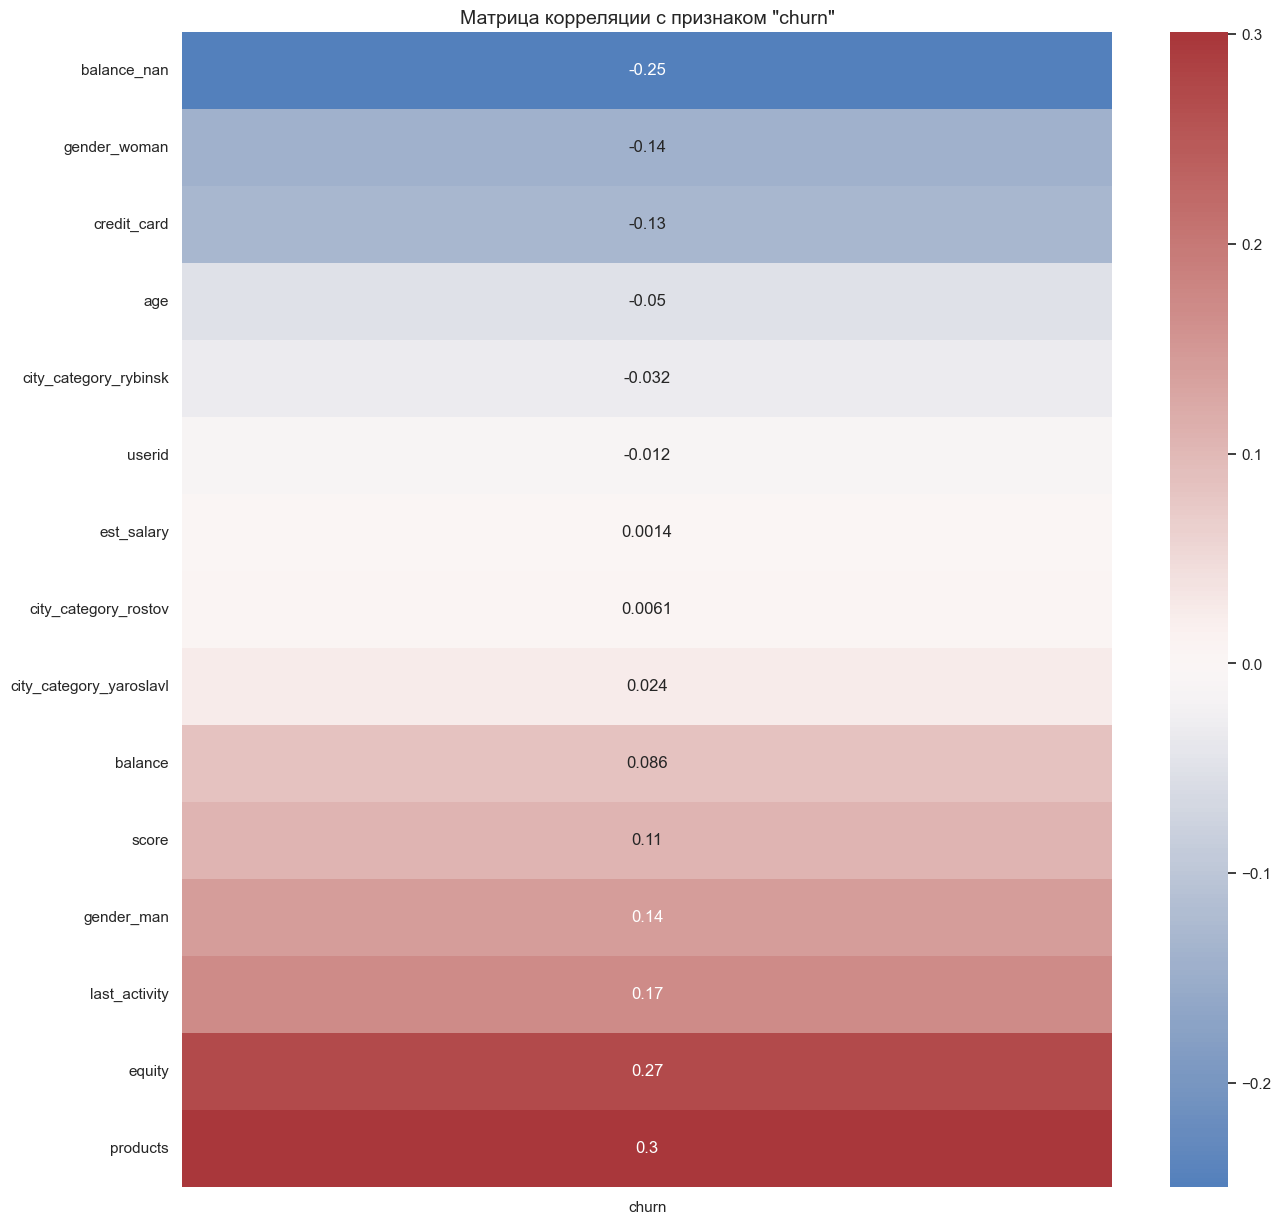

In [50]:
sns.heatmap(matrix_corr.loc[:, ['churn']].drop('churn').sort_values('churn'), 
            annot=True, cmap="vlag", center=0)
plt.title('Матрица корреляции с признаком "churn"', fontsize = 14)
sns.set(rc = {'figure.figsize':(4,4)})

Оценка силы связи согласно шкале Чеддока:
- слабая — от 0,1 до 0,3; 
- умеренная — от 0,3 до 0,5; 
- заметная — от 0,5 до 0,7; 
- высокая — от 0,7 до 0,9; 
- весьма высокая (сильная) — от 0,9 до 1,0.

Используя шкалу Чеддока интерпретируем полученные результаты:
- Отсутствует связь между оттоком и городом, где расположено отделение банка
- Между оттоком и баллами оценка собственности клиента присутствует слабая прямая (0,27) связь
- Также слабая прямая связь есть между оттоком и активностью клиента и оттоком и полом клиента.
- Умеренная прямая связь (0,3) между оттоком клиентов и количеством оформленных банковских продуктов.

Все это подтверждает ранее полученные выводы.

## 3.7 Гипотеза о равенстве средних уровней баланса отточного и неотточного клиентов

Проверим, есть ли связь между балансом на счете клиента и оттоком. Сформулируем гипотезы: Н0 - средний уровень баланса отточного и неотточного клиента одинаков, Н1 - средний уровень баланса  отточного и неотточного клиента различны.

In [51]:
# results = вызов метода для проверки гипотезы
results_balance = st.ttest_ind(df.query('churn == 0')['balance'].dropna(), df.query('churn == 1')['balance'].dropna(), equal_var = False)

# alpha = зададим значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print('p-value', results_balance.pvalue)
# условный оператор с выводом строки с ответом
if results_balance.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-value 2.0439782929669127e-13
Отвергаем нулевую гипотезу


p-value значительно меньше критического уровеня статистической значимости (alpha). Значит средний уровень баланса отточного и неотточного клиента имеет статистически значимые различия.

## 3.8 Гипотеза о равенстве долей оттока клиентов мужчин и женщин

Проверим, равны ли доли оттока клиентов мужчин и женщин. Проверим следующие гипотезы при помощи Z-теста: Н0: доли оттока клиентов мужчин и женщин равны. Н1: доли оттока клиентов мужчин и женщин различны.


In [52]:
group_size = df['gender_man'].value_counts() #размер групп
share_size = df.groupby('gender_man')['churn'].sum() #размер целевых подгрупп в группах
   
# alpha = зададим значение уровня значимости
alpha = 0.05
    
p = share_size / group_size #доли
p_combined = share_size.sum() / group_size.sum() #общая доля
# разница пропорций в датасетах
difference = p[0] - p[1]
    
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/group_size[0] + 1/group_size[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


По результатам проведения теста - p_value близко к 0, значит отвергаем нулевую гипотезу. Между долями оттока клиентов мужчин и женщин есть статистически значимая разница.

## 3.9 Вывод

В ходе проведенного анализа был построен портрет типичного отточного клиента и выявлены факторы, влияющие на отток клиентов.

Типичный клиент, склонный к оттоку - это:
- мужчина возрастом 41-42 года
- из Ярославля
- у которого оформленно более 2 банковских продуктов
- высокий кредитный рейтинг
- у клиента более 3 баллов оценочной собственности по системе банка
- он проявлял активность при пользовании банковскими услугами
- на его счете более 1,1 млн.рубл.
- зарплата около 148 000 рубл.

На отток клиентов из банка сильное влияние оказывают следующие факторы:
- наличие денежных средств на счетах клиентов. Клиенты с суммами более 750000 рубл. чаще уходят из банка.
- количество оформленных банковских продуктов. У клиентов с 3, 4 банковскими продуктами уровень оттока составляет 63% и 42% соответственно.
- баллы оценки собственности. При баллах выше 5 уровень оттока превышает 30%. 
- пол клиента. Мужчиты более склонны к оттоку, чем женщины.

Между городом, уровнем дохода и оттоком связи нет.


# 4. Сегментация клиентов банка

In [53]:
segment_1 = df.query('830<=score<=900 and last_activity==1 and gender_man==1')
print('Количество клиентов', len(segment_1))
print('Средний уровень оттока', (segment_1['churn'].mean()*100).round(2))
print('Уровень охвата', round(len(segment_1)/len(df)*100, 2))
print('Количество отточных', len(segment_1.query('churn==1'))) 
print('Количество неотточных', len(segment_1.query('churn==0')))

Количество клиентов 866
Средний уровень оттока 46.3
Уровень охвата 8.66
Количество отточных 401
Количество неотточных 465


In [54]:
segment_2 = df.query('gender_man==1 and balance>=500000 and credit_card==0')
print('Количество клиентов', len(segment_2))
print('Средний уровень оттока', (segment_2['churn'].mean()*100).round(2))
print('Уровень охвата', round(len(segment_2)/len(df)*100, 2))
print('Количество отточных', len(segment_2.query('churn==1'))) 
print('Количество неотточных', len(segment_2.query('churn==0')))

Количество клиентов 726
Средний уровень оттока 51.65
Уровень охвата 7.26
Количество отточных 375
Количество неотточных 351


In [55]:
segment_3 = df.query('age<=34 and credit_card==0')
print('Количество клиентов', len(segment_3))
print('Средний уровень оттока', (segment_3['churn'].mean()*100).round(2))
print('Уровень охвата', round(len(segment_3)/len(df)*100, 2))
print('Количество отточных', len(segment_3.query('churn==1'))) 
print('Количество неотточных', len(segment_3.query('churn==0')))

Количество клиентов 765
Средний уровень оттока 35.82
Уровень охвата 7.65
Количество отточных 274
Количество неотточных 491


In [56]:
segment_4 = df.query('50<age<60')
print('Количество клиентов', len(segment_4))
print('Средний уровень оттока', (segment_4['churn'].mean()*100).round(2))
print('Уровень охвата', round(len(segment_4)/len(df)*100, 2))
print('Количество отточных', len(segment_4.query('churn==1'))) 
print('Количество неотточных', len(segment_4.query('churn==0')))

Количество клиентов 1410
Средний уровень оттока 28.09
Уровень охвата 14.1
Количество отточных 396
Количество неотточных 1014


In [57]:
segment_5 = df.query('equity>=4 and products>2 and balance>=750000')
print('Количество клиентов', len(segment_5))
print('Средний уровень оттока', (segment_5['churn'].mean()*100).round(2))
print('Уровень охвата', round(len(segment_5)/len(df)*100, 2))
print('Количество отточных', len(segment_5.query('churn==1'))) 
print('Количество неотточных', len(segment_5.query('churn==0')))

Количество клиентов 548
Средний уровень оттока 54.93
Уровень охвата 5.48
Количество отточных 301
Количество неотточных 247


In [58]:
segment_6 = df.query('last_activity==1 and credit_card==0 and gender_man==1')
print('Количество клиентов', len(segment_6))
print('Средний уровень оттока', (segment_6['churn'].mean()*100).round(2))
print('Уровень охвата', round(len(segment_6)/len(df)*100, 2))
print('Количество отточных', len(segment_6.query('churn==1'))) 
print('Количество неотточных', len(segment_6.query('churn==0')))

Количество клиентов 720
Средний уровень оттока 41.94
Уровень охвата 7.2
Количество отточных 302
Количество неотточных 418


In [59]:
segment_7 = df.query('balance>1500000')
print('Количество клиентов', len(segment_7))
print('Средний уровень оттока', (segment_7['churn'].mean()*100).round(2))
print('Уровень охвата', round(len(segment_7)/len(df)*100, 2))
print('Количество отточных', len(segment_7.query('churn==1'))) 
print('Количество неотточных', len(segment_7.query('churn==0')))

Количество клиентов 720
Средний уровень оттока 50.0
Уровень охвата 7.2
Количество отточных 360
Количество неотточных 360


Сегмент 1 - активные мужчины с баллами кредитного скоринга в пределах 830-900 баллов. Средний уровень оттока 46.3%.
Сегмент 2 - мужчины без кредитной карты с балансом на счете более 500000 рубл. Средний уровень оттока 51,65%.
Сегмент 3 - молодежь в возрасте до 34 лет без кредитной карты. Средний уровень оттока 35,82%.
Сегмент 4 - люди предпенсионного возраста. Средний уровень оттока 28,09%.
Сегмент 5 = люди с 3 и более оформленными банковскими продуктами, высокими балламии кредитного скоринга и с балансом на счете более 750000 рублей. Средний уровень оттока 54,93%.
Сегмент 6 = Активные мужчины без кредитной карты. Средний уровень оттока 41,94%.
Сегмент 7 = люди с балансом на счете более 1500000 рублей. Средний уровень оттока 42,45%.

Сегмент 5 и сегмент 7 можно отнести к VIP клиентам. Это состоятельные люди, которые держат на счетах крупные суммы денежных средств и активно пользуются услугами банков.

# 5. **Рекомендации для заказчика**

В результате работы было выделено 7 сегментов. Для каждого из них будут даны рекомендации.

Сегмент 1 - Мужчины с хорошим кредитным рейтингом.
- предложения кредитов с пониженными процентными ставками.

Сегмент 2 - мужчины без кредитной карты с балансом на счете более 500000 рубл.
- повышенные проценты по вкладам

Сегмент 3 и сегмент 4 - люди определенного возраста. Отток выше среднего по банку, но в зависимости от возраста можно подобрать актуальные услуги.

Сегмент 3- молодежь без кредитной карты:
- кредитные карты с повышенным кэшбеком на покупки в наиболее популярных у молодежи категориях, таких как мобильная электроника, одежда, обувь, аксессуары.
- скидки при оплате различных образовательных услуг при использовании кредитной карты.

Сегмент 4 - люди предпенсионного возраста. 
- увеличеннные проценты по долгосрочным вкладам,
- выпуск специальные карты с повышенным кэшбэком в отдельных магазинах и аптеках.

Сегмент 5 и сегмент 7 можно отнести к VIP клиентам. Это состоятельные люди, которые держат на счетах крупные суммы денежных средств и активно пользуются услугами банка. Таким клиентам целесообразно предложить:
- персональное обслуживание, отдельный номер горячей линии, персонального менеджера, выделенные зоны обслуживания
- дополнительные бонусы при использовании продуктов банка, как оформление банковских карт премиум-класса со множеством привилегий (скидки в торгово-сервисных точках, доступ в бизнес-залы аэропортов, участие в закрытых клубах).

Сегмент 6 - мужчины, интересующиеся услугами банка, но не имеющие кредитной карты.
- кредитные карты с повышенным кэшбеком на покупки в строительных магазинах, магазинах техники и он-лайн игр.


# 6. Презентация

Презентация по ссылке
https://disk.yandex.ru/i/cOd-rUjG7Djn5g

# 7. Общий вывод

Задачами проведенного исследования были: анализ клиентов регионального банка, выделение сегментов клиентов, склонных к оттоку из банка, рекомендация мероприятий, которые можно провести, чтобы вернуть клиентов в банк или удержать сомневающихся от оттока.

В ходе работы была проведена предобработка данных, проанализированны пропуски в данных.
В ходе предобработки были проанализированы и предобработаны входные данные. В ходе исследовательского анализа изучены распределения признаков, в т.ч. в разрезе оттока, выявлены признаки, влияющие на отток клиентов, выдвинуты и проверены гипотезы о влиянии признаков на отток клиентов. На основании этих признаков выделены сегменты клиентов, склонных к оттоку и даны рекомендации по их удержанию.

Типичный клиент, склонный к оттоку - это:
- мужчина возрастом 41-42 года
- из Ярославля
- у которого оформленно более 2 банковских продуктов
- высокий кредитный рейтинг
- у клиента более 3 баллов оценочной собственности по системе банка
- он проявлял активность при пользовании банковскими услугами
- на его счете более 1,1 млн.рубл.
- зарплата около 148 000 рубл.

На отток клиентов сильное влияние оказывают следующие факторы:

- наличие денежных средств на счетах клиентов. 
- количество оформленных банковских продуктов. 
- баллы оценки собственности. 
- пол клиента. 

Между городом, уровнем дохода и оттоком связи нет.

Для удержания клиентов в зависимости от сегментов можно применить следующие методы и акционные продукты:
- кредитные карты с повышенным кэшбеком на покупки в отдельных категориях, популлярных для сегментов клиентов,
- предложения кредитов с пониженными процентными ставками для людей с высоким кредитным рейтингом,
- повышенные проценты по вкладам,
- персональное обслуживание, дополнительные бонусы при использовании продуктов банка для vip-клиентов.